#**PART 01**

## **Creation of  feature matrix**
Instead of working with the original scalar-valued
inputs, we will map each input x using a degree-k polynomial as $φ_k (x) = {[1, x, x^2 , . .  , x^k ]}^T$. When
using the mapping $φ_k$, each original input becomes k + 1 dimensional. Denoting  the entire set of mapped inputs as
$φ_k(x)$, a $10 × (k + 1)$ matrix where $k=1,2,3,4$.



In [78]:
import numpy as np

x =  np.array([-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62])
y =  np.array([1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51])

mapped_input=np.zeros((10,5),dtype=float)

for i in range(len(x)):
    for j in range(5):
        mapped_input[i][j]=x[i]**j



# **Calculating the Posterior**
$\displaystyle p(w|y,X,\beta) \propto \mathcal{N}(w|0,I)* \mathcal{N}(Y|Xw,\beta^{-1}I)=\mathcal{N}(\mu_N,\Sigma_N)$ so we have 

Covariance matrix , $\Sigma_N={(\beta X^TX+I)^{-1}}$ and
mean, $\mu_N=\Sigma_N[\beta X^TY]$


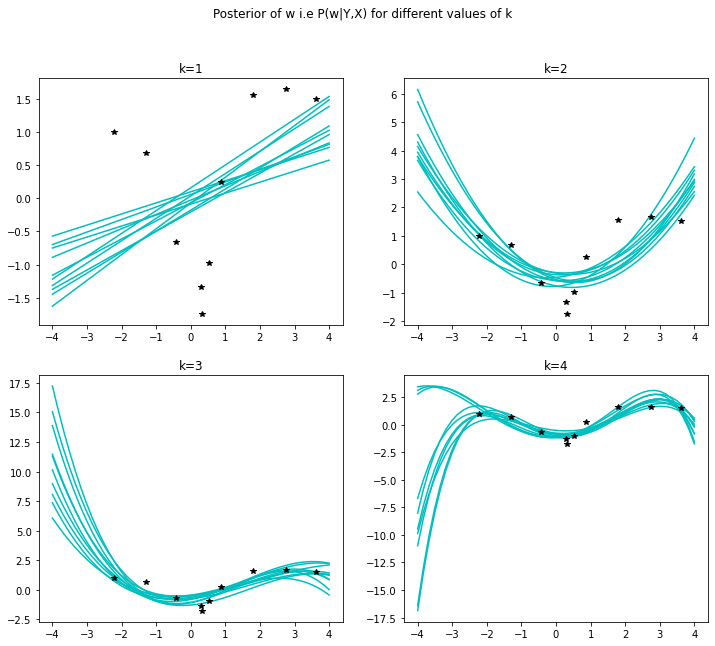

In [79]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Posterior of w i.e P(w|Y,X) for different values of k')

plots=[ax1,ax2,ax3,ax4]

for i in range(1,5):

    Cov= np.linalg.inv(4*(mapped_input[:,:i+1]).T@(mapped_input[:,:i+1])+np.eye(i+1))
    Mean= 4*Cov@mapped_input[:,:i+1].T@y
    Drawn_Weights=np.random.multivariate_normal(Mean,Cov, 10)
    x_values=np.linspace(-4,4,50)
    y_values=np.zeros((len(x_values),i+1),dtype=float)
    for j in range(len(x_values)):
        for k in range(i+1):
            y_values[j][k]=x_values[j]**k
    for w in Drawn_Weights:
        plots[i-1].plot(x_values,y_values@w,'c')

    plots[i-1].plot(x,y,'k*')
    plots[i-1].set_title( 'k=' + str(k))
plt.show()


#**PART 02**.
# **Computing the predictive posterior**

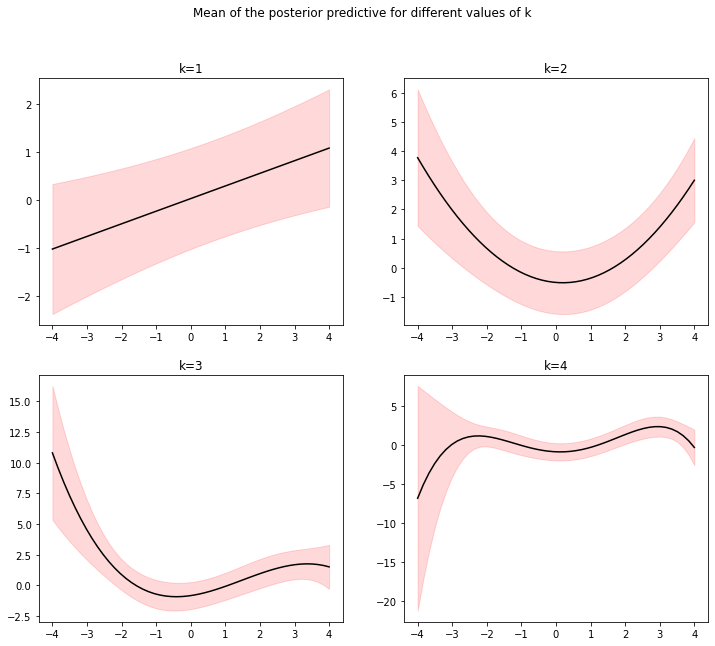

In [80]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Mean of the posterior predictive for different values of k')

plots=[ax1,ax2,ax3,ax4]

for i in range(1,5):

    Cov= np.linalg.inv(4*(mapped_input[:,:i+1]).T@(mapped_input[:,:i+1])+np.eye(i+1))
    mean= 4*Cov@mapped_input[:,:i+1].T@y
    x_values=np.linspace(-4,4,50)
    y_values=np.zeros((len(x_values),i+1),dtype=float)
    for j in range(len(x_values)):
        for k in range(i+1):
            y_values[j][k]=x_values[j]**k

    (mean_plus,mean_minus)=(y_values @ mean + 2*(np.sqrt(((1/4) + y_values @ Cov @ y_values.T).diagonal())),
                            y_values @ mean - 2*(np.sqrt(((1/4) + y_values @ Cov @ y_values.T).diagonal())))

    
    plots[i-1].plot(x_values,y_values @ mean,'k')
    plots[i-1].fill_between(x_values, mean_minus, mean_plus, alpha=0.15,color='r')
    plots[i-1].set_title( 'k=' + str(k))
plt.show()

#**PART 03**
#**Compute the log marginal likelihood**

In [81]:
log_marginals=[]

for i in range(1,5):
    log_marginals.append( np.log(multivariate_normal.pdf(y, np.zeros(10,dtype=float),
                                    (1/4)*np.eye(10,dtype=float) + (mapped_input[:,:i+1])@(mapped_input[:,:i+1].T))))
    
for l in range(len(log_marginals)):
    print('Log marginal likelihood(k='+str(l+1)+') =', round(log_marginals[l],3))



Log marginal likelihood(k=1) = -32.352
Log marginal likelihood(k=2) = -22.772
Log marginal likelihood(k=3) = -22.079
Log marginal likelihood(k=4) = -22.387


#**PART 04**
#**Log likelihood using MAP estimate**

In [82]:
log_likelihood=[]

for i in range(1,5):
    Cov= np.linalg.inv(4*(mapped_input[:,:i+1]).T@(mapped_input[:,:i+1])+np.eye(i+1))
    mean= 4*Cov@mapped_input[:,:i+1].T@y
    log_likelihood.append(np.log(multivariate_normal.pdf(y, mapped_input[:,:i+1]@ mean, (1/4)*np.eye(10))))

for l in range(len(log_likelihood)):
    print('Log likelihood(k='+str(l+1)+') =', round(log_likelihood[l],3))

Log likelihood(k=1) = -28.094
Log likelihood(k=2) = -15.361
Log likelihood(k=3) = -10.936
Log likelihood(k=4) = -7.225
